Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as nth degree polynomial.Polynomial regression fits a non-linear relationship between the value of c and the corresponding conditional mean of y.
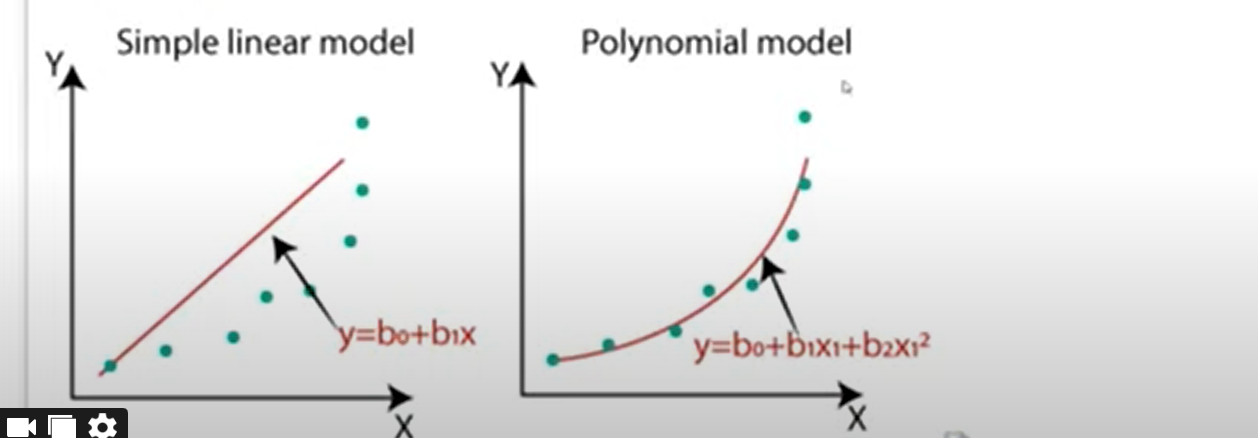



In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import math

In [2]:
! pip install kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [19]:
!kaggle datasets download -d farhanmd29/50-startups

Dataset URL: https://www.kaggle.com/datasets/farhanmd29/50-startups
License(s): other


In [20]:
#extracting the compressed file
from zipfile import ZipFile
dataset = '/content/50-startups.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [21]:
df = pd.read_csv('/content/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [23]:
df.shape

(50, 5)

In [18]:
len(df['age'])

17

In [25]:
df.isnull().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [26]:
df.dtypes

,0
R&D Spend,float64
Administration,float64
Marketing Spend,float64
State,object
Profit,float64


In [28]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [30]:
X = df[['R&D Spend','Administration','Marketing Spend','State']].values
Y = df[['Profit']].values

In [31]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [32]:
print(Y)

[[192261.83]
 [191792.06]
 [191050.39]
 [182901.99]
 [166187.94]
 [156991.12]
 [156122.51]
 [155752.6 ]
 [152211.77]
 [149759.96]
 [146121.95]
 [144259.4 ]
 [141585.52]
 [134307.35]
 [132602.65]
 [129917.04]
 [126992.93]
 [125370.37]
 [124266.9 ]
 [122776.86]
 [118474.03]
 [111313.02]
 [110352.25]
 [108733.99]
 [108552.04]
 [107404.34]
 [105733.54]
 [105008.31]
 [103282.38]
 [101004.64]
 [ 99937.59]
 [ 97483.56]
 [ 97427.84]
 [ 96778.92]
 [ 96712.8 ]
 [ 96479.51]
 [ 90708.19]
 [ 89949.14]
 [ 81229.06]
 [ 81005.76]
 [ 78239.91]
 [ 77798.83]
 [ 71498.49]
 [ 69758.98]
 [ 65200.33]
 [ 64926.08]
 [ 49490.75]
 [ 42559.73]
 [ 35673.41]
 [ 14681.4 ]]


<Figure size 1000x1000 with 0 Axes>

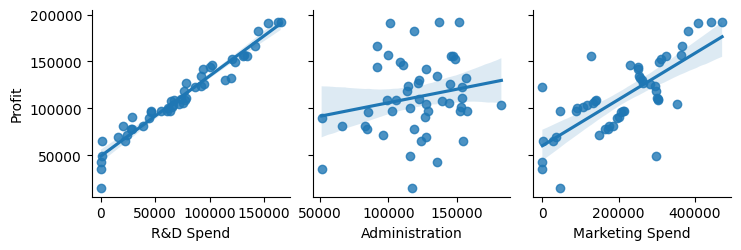

In [35]:
plt.figure(figsize=(10,10))
# The 'annot' parameter is not available in 'pairplot'. Remove it.
sns.pairplot(df, y_vars=['Profit'], x_vars=['R&D Spend','Administration','Marketing Spend'], kind='reg', diag_kind='kde')

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#"state" column in our dataset has text values so we are converting it into numerical values
ct = ColumnTransformer([("state", OneHotEncoder(),[3])], remainder = 'passthrough')
X = ct.fit_transform(df[['R&D Spend','Administration','Marketing Spend','State']].values)
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In [41]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [42]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(X_train)
poly.fit_transform(x_poly, Y_train)

array([[1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        4.89282225e+20, 1.01901373e+21, 2.12226999e+21],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        6.42310799e+20, 1.33092579e+21, 2.75779802e+21],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.53431412e+20, 3.06654093e+20, 2.66067841e+20],
       ...,
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.10499805e+21, 1.47710840e+21, 1.97452767e+21],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.94112898e+20, 3.76881076e+20, 7.31735742e+20],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.92404052e+19, 3.52164000e+18, 6.44578331e+17]])

In [43]:
model = LinearRegression()
model.fit(x_poly,Y_train)

LinearRegression()

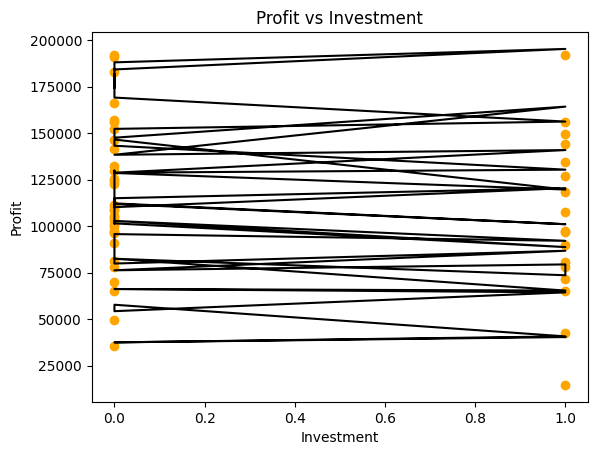

In [50]:
X_1D = X[:, 0]

plt.scatter(X_1D, Y, color='orange')

plt.plot(X_1D, model.predict(poly.fit_transform(X)), color='black')
plt.title('Profit vs Investment')
plt.xlabel('Investment')
plt.ylabel('Profit')
plt.show()
#weird graph